In [1]:
flex_subtitle = "built using jupyter-flex"
flex_source_link = "https://github.com/danielfrg/jupyter-flex/blob/master/examples/layouts/sidebar-pages.ipynb"

In [2]:
%matplotlib inline
# Native librairie
import re

# DA Librairie
import pandas as pd 
import numpy as np

# DS Librairie
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.cluster import KMeans
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Visualisation

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from chart_studio.plotly import plot, iplot
import chart_studio.grid_objs as go
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import display

from IPython.display import Image, HTML
from IPython.display import display as disp

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [3]:
def all_plan(start, n_comp=4, just_next_plan=False):
    plan = []
    if just_next_plan:
        for i in range(start + 1, n_comp, 2):
            plan.append((i - 1, i))
    else:
        for i in range(start, n_comp):
            for j in range(i + 1, n_comp):
                plan.append((i, j))
    return plan


def get_all_numeric_col(data):
    all_numeric_col = []
    all_type_nume = ["float64", "int64"]
    for col in list(data.columns):
        dtype = str(data[col].dtypes)
        if dtype in all_type_nume:
            all_numeric_col.append(col)
    return all_numeric_col


def describe_data(data,
                  how=[np.number, object],
                  decimal_digit=3,
                  numeric_value_return=False):
    if type(data) != type(pd.DataFrame()):
        raise ValueError(
            f"data n\'est pas un DataFrame pandas mais de type {type(data)}!")

    for v in how:
        if (str(v) != str(np.number)) & (str(v) != str(object)):
            print(
                f"\"how\" ne peut contenir que \"np.number\" ou \"object\", \"{str(v)}\" ne correspond pas!"
            )
    if numeric_value_return:
        return data.describe(include=how).T

    if not object in how:
        if type(decimal_digit) == int:
            if decimal_digit >= 0:
                digit_format = "{0:." + str(decimal_digit) + "f}"
            else:
                digit_format = "{0:." + str(0) + "f}"
        else:
            digit_format = "{0:." + str(3) + "f}"

        return data.describe(
            include=how).apply(lambda s: s.apply(digit_format.format)).T
    else:
        return data.describe(include=how).T


# Normalisation du graphique des 10 valeurs les plus récurrentes


def plot_qualitatives_best(data, col_name, podium_size=10):
    # vérification
    if type(data) != type(pd.DataFrame()):
        raise ValueError(
            f"data n\'est pas un DataFrame pandas mais de type {type(data)}!")

    if not col_name in data.columns:
        raise ValueError(f"La colonne {col_name} n'existe pas dans le dataset")

    test = data.groupby(
        [col_name]).size().sort_values(ascending=False).head(podium_size)

    if len(test) == 0:
        raise ValueError(
            f"La colonne {col_name} ne contient aucune valeur (exclude NaN)")

    if len(test) < podium_size:
        podium_size = len(test)

#     plt.figure(figsize=(16, 11))

    sns.set(style="whitegrid")
    sns_palette.n_colors = podium_size

    ax = sns.barplot(x=test.values,
                     y=test.index,
                     palette=sns_palette,
                     orient="h")

    plt.title('Nombre d\'occurences de la colonne ' + test.index.name,
              fontsize=16)
    plt.xlabel("Nombre d'occurrences", fontsize=14)
    plt.ylabel(test.index.name, fontsize=14)

    # affiche le nombre de valeur à droite de la barre
    for i, v in enumerate(test.values.tolist()):
        ax.text(v, i, str(v), color='black', fontweight='normal')

    plt.show()


# ANOVA
#  figsize=(15, 10)
def anova_analysis(data,
                   qualitative_col,
                   quantitative_col,
                   display_na=False):
    if not display_na:
        modalites = [
            m for m in data[qualitative_col].unique() if str(m) != "nan"
        ]
    else:
        modalites = [m for m in data[qualitative_col].unique()]
    groupes = []
    for m in modalites:
        groupes.append(
            perfect_data[perfect_data[qualitative_col] == m][quantitative_col])
    medianprops = {'color': "black"}
    meanprops = {
        'marker': 'o',
        'markeredgecolor': 'black',
        'markerfacecolor': 'firebrick'
    }
#     plt.figure(figsize=figsize)
    plt.boxplot(groupes,
                labels=modalites,
                showfliers=False,
                medianprops=medianprops,
                vert=True,
                patch_artist=True,
                showmeans=True,
                meanprops=meanprops)
    plt.show()


# PCA


def display_circles(pcs,
                    pca,
                    axis_ranks,
                    n_comp=4,
                    labels=None,
                    label_rotation=0,
                    lims=None):
    for d1, d2 in axis_ranks:  # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots()
#             figsize=(10, 9)

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(pcs[d1, :]), min(
                    pcs[d2, :]), max(pcs[d2, :])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]),
                           np.zeros(pcs.shape[1]),
                           pcs[d1, :],
                           pcs[d2, :],
                           angles='xy',
                           scale_units='xy',
                           scale=1,
                           color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(
                    LineCollection(lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x,
                                 y,
                                 labels[i],
                                 fontsize='14',
                                 ha='center',
                                 va='center',
                                 rotation=label_rotation,
                                 color="blue",
                                 alpha=0.5)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1 + 1, round(100 * pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2 + 1, round(100 * pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(
                d1 + 1, d2 + 1))
            plt.show(block=False)


# PCA individu


def display_factorial_planes(X_projected,
                             n_comp,
                             pca,
                             axis_ranks,
                             sample_individu=10,
                             labels=None,
                             alpha=1,
                             illustrative_var=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig = plt.figure()
#             figsize=(10, 9)

            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1],
                            X_projected[:, d2],
                            alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(
                        illustrative_var == value)[0][:sample_individu]
                    plt.scatter(X_projected[selected, d1],
                                X_projected[selected, d2],
                                alpha=alpha,
                                label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                    plt.text(x,
                             y,
                             labels[i],
                             fontsize='14',
                             ha='center',
                             va='center')

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1 + 1, round(100 * pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2 + 1, round(100 * pca.explained_variance_ratio_[d2], 1)))

            plt.title("Projection des individus (sur F{} et F{})".format(
                d1 + 1, d2 + 1))
            plt.show(block=False)


def PCA_analysis(data,
                 axis_ranks,
                 n_comp=4,
                 labels=None,
                 label_rotation=0,
                 lims=None,
                 fillna_mean=False,
                 alpha=1,
                 illustrative_var=None,
                 sample_individu=10):

    data_pca = data
    if fillna_mean:
        data_pca.fillna(data.mean(), inplace=True)

    X = data_pca.values
    names = data_pca.index
    features = data_pca.columns
    # Centrage et Réduction
    std_scale = preprocessing.StandardScaler().fit(X)
    X_scaled = std_scale.transform(X)

    # Calcul des composantes principales
    pca = decomposition.PCA(n_components=n_comp)
    pca.fit(X_scaled)

#     plt.figure(figsize=(15, 10))
    plt.title("Ebouli")
    ebouli = pca.explained_variance_ratio_ * 100
    plt.bar(np.arange(len(pca.explained_variance_ratio_)),
            ebouli,
            alpha=0.9,
            label="inertie ratio")
    plt.plot(np.arange(len(pca.explained_variance_ratio_)),
             ebouli.cumsum(),
             c="red",
             ls="--",
             label="inertie cumulé")
    plt.legend()
    plt.show()

    pcs = pca.components_
    # circle correlation
    display_circles(pcs,
                    pca,
                    axis_ranks,
                    n_comp,
                    labels=labels,
                    label_rotation=label_rotation,
                    lims=lims)
    # data projection
    X_projected = pca.transform(X)
    display_factorial_planes(X_projected,
                             n_comp,
                             pca,
                             axis_ranks,
                             alpha=alpha,
                             illustrative_var=illustrative_var,
                             sample_individu=sample_individu)


def repartition_quantitative_values_rate(data,
                                         col_quantitative,
                                         grouped_value="",
                                         normalize=True):
    if normalize:
        if grouped_value != "":
            group = data.groupby(grouped_value)
            value = group[col_quantitative].describe().loc[:, (slice(None),
                                                               ['mean'])].T
            new_tab = pd.DataFrame()
            for k in list(group.groups.keys()):
                all_value = value[k]
                new_tab[k] = (
                    1 - (all_value.sum() - all_value) / all_value.sum()) * 100
            return new_tab
        else:
            value = data[col_quantitative].describe().loc[['mean']].T
            return (1 - (value.sum() - value) / value.sum()) * 100
    else:
        if grouped_value != "":
            group = data.groupby(grouped_value)
            value = group[col_quantitative].describe().loc[:, (slice(None),
                                                               ['mean'])].T
            new_tab = pd.DataFrame()
            for k in list(group.groups.keys()):
                all_value = value[k]
                new_tab[k] = all_value.values
            new_tab.index = col_quantitative
            return new_tab
        else:
            return data[col_quantitative].describe().loc[['mean']].T


def fair_distribution(data,
                      col_qualitative,
                      sample_size=-1,
                      get_na_value=False,
                      random_state=0,
                      fillna_method=""):
    group_grade = data.groupby(col_qualitative)
    data_value = []
    if sample_size <= 0:
        sample_size = data[col_qualitative].value_counts().min()
    elif data[col_qualitative].value_counts().min() < sample_size:
        sample_size = data[col_qualitative].value_counts().min()
    if get_na_value:
        all_na = data[data[col_qualitative].astype(str) == "nan"]
        if all_na.shape[0] < sample_size:
            sample_size = all_na.shape[0]

    for k in group_grade[col_qualitative].groups.keys():
        data = group_grade.get_group(k)
        if fillna_method == "mean":
            data_value.append(
                data.fillna(data.mean()).sample(sample_size,
                                                random_state=random_state))
        else:
            data_value.append(
                data.sample(sample_size, random_state=random_state))
    if get_na_value:
        data_value.append(all_na.sample(sample_size,
                                        random_state=random_state))

    return pd.concat(data_value, axis=0)


# normalisation du graphique de carte de chaleur


def plot_heatmap(data,
                 xlabel,
                 ylabel,
                 title,
                 colorbar_display=False,
                 label_colorbar="Répartition",
                 fmt="f",
                 annot=True,
                 linewidths=.1):
    plt.figure()
#     figsize=(15, 10)
    if annot:
        ax = sns.heatmap(data,
                         cmap=sns_palette,
                         linewidths=linewidths,
                         annot=annot,
                         fmt=fmt,
                         cbar=colorbar_display)
    else:
        ax = sns.heatmap(data,
                         cmap=sns_palette,
                         linewidths=linewidths,
                         annot=annot,
                         cbar=colorbar_display)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if colorbar_display:
        ax.collections[0].colorbar.set_label(label_colorbar)
    plt.show()

In [4]:
# Palette couleur graphique utilisée
couleur = "dark:#8ab6d6"
# Création des palettes
sns_palette=sns.color_palette(couleur,n_colors=10)
mpl_palette=mpl.colors.ListedColormap([i for i in sns.color_palette(couleur,n_colors=100)])

In [5]:
data = pd.read_csv("./data/fr.openfoodfacts.org.products.cleaned.minimal.csv",
                   index_col="code",
                   low_memory=False)
data = data[[
    'product_name', 'energy-kcal_100g', 'energy_100g', 'fat_100g',
    'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
    'salt_100g', 'sodium_100g', 'nutriscore_grade', 'image_url'
]]

quantitative_exclude_energy = [
    'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
    'proteins_100g', 'salt_100g', 'sodium_100g'
]

quantitative = [
    'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
    'carbohydrates_100g', 'sugars_100g', 'sodium_100g', 'proteins_100g',
    'salt_100g'
]

data[quantitative] = data[quantitative].fillna(0)

In [6]:
image = data["image_url"]
data = data.drop("image_url", axis=1)

# Univarié

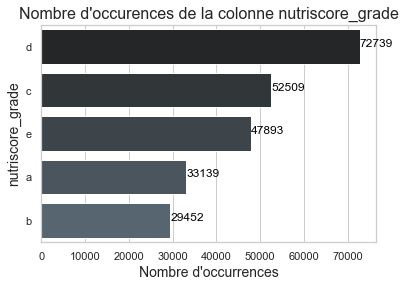

In [7]:
plot_qualitatives_best(data, "nutriscore_grade")

# Multivarié

Nutriscore_grade relation pour chaque valeurs: 


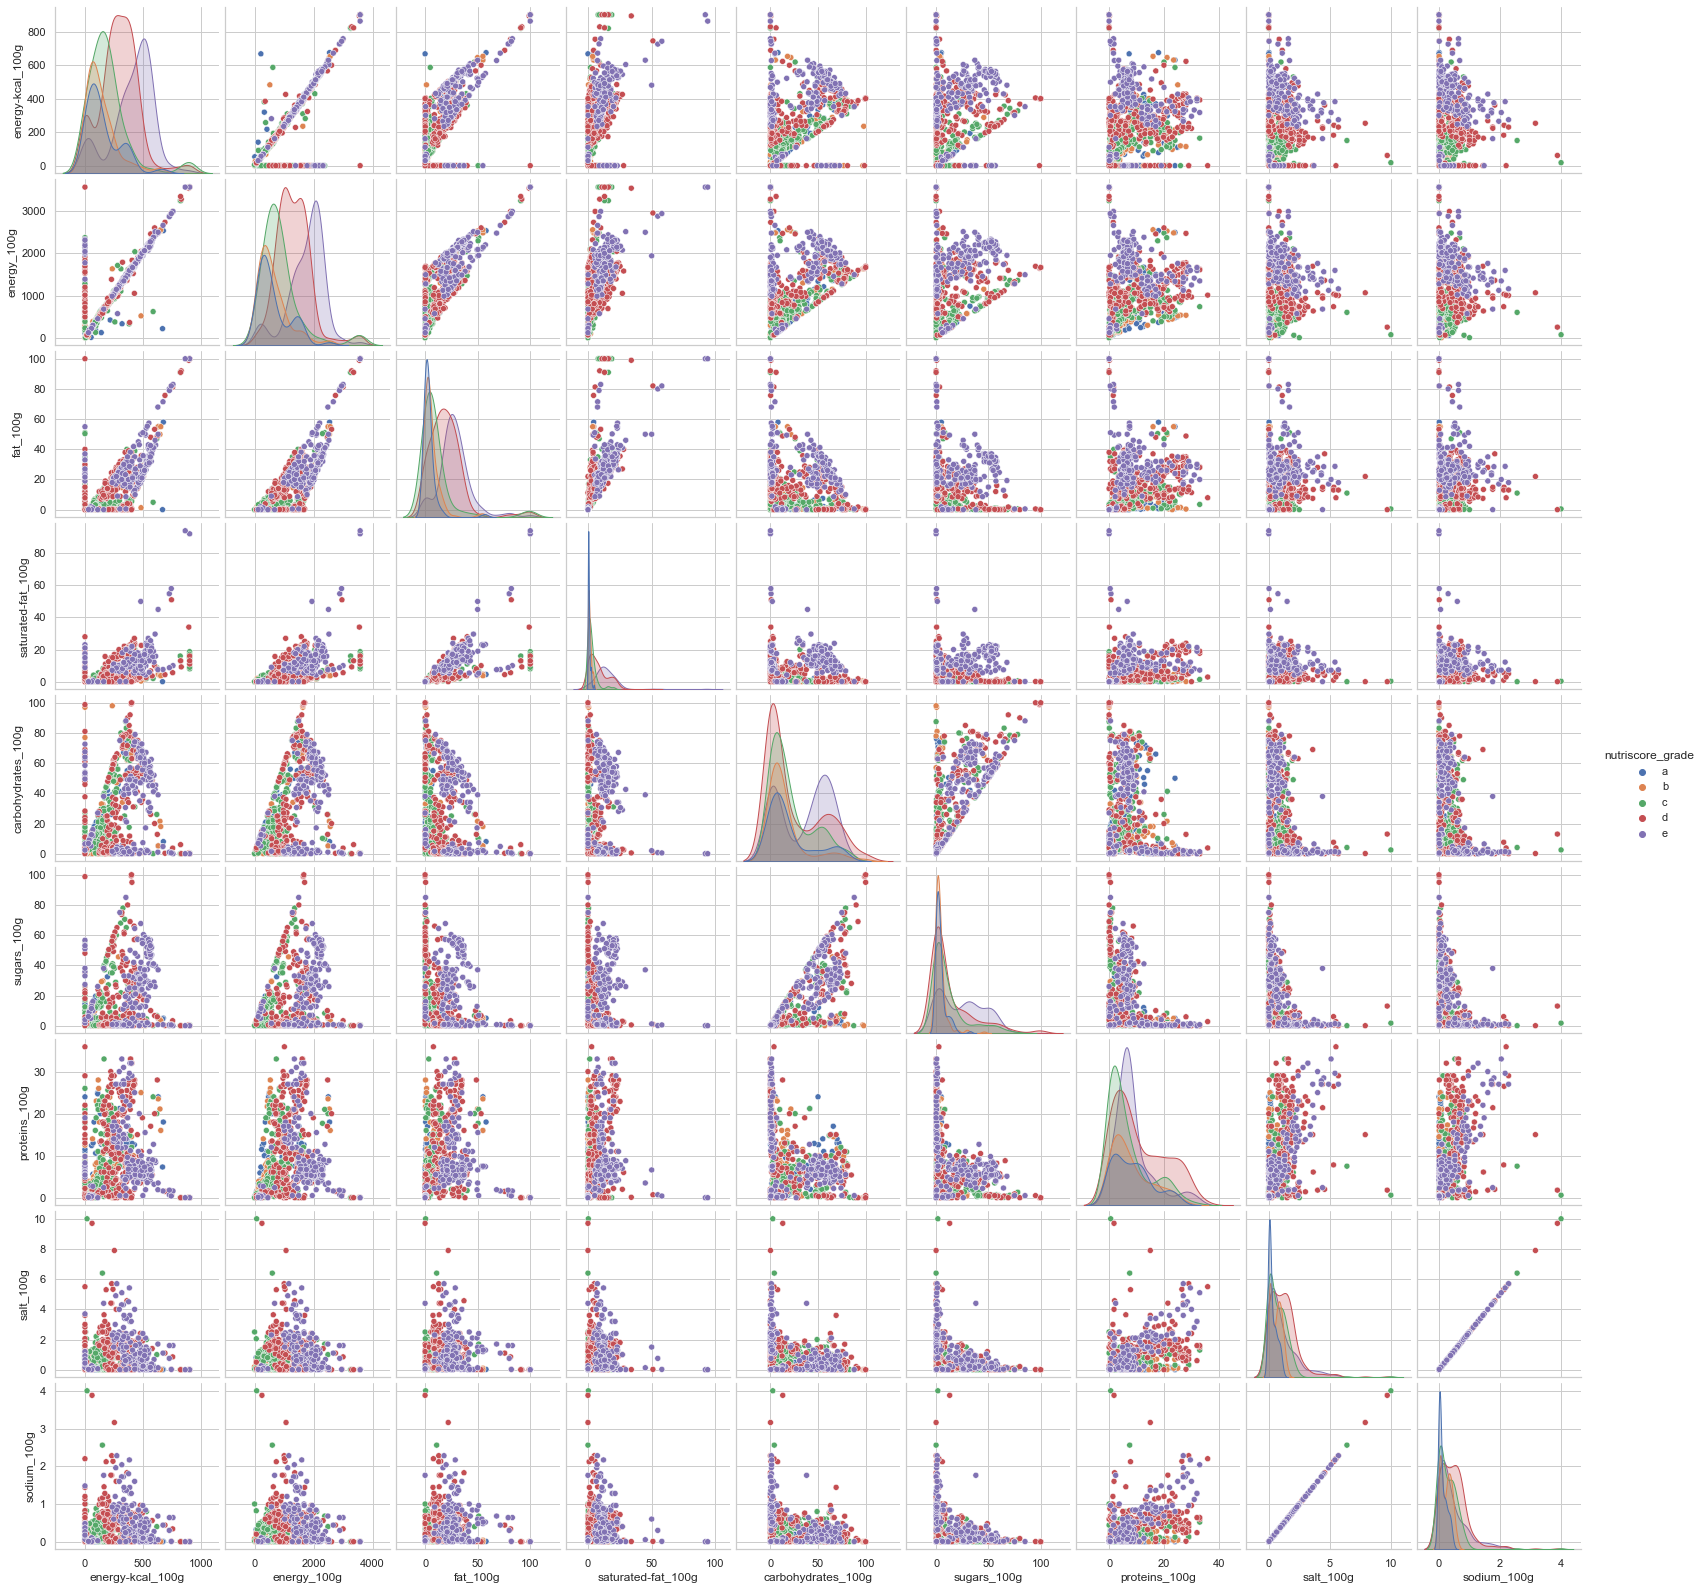

In [8]:
print("Nutriscore_grade relation pour chaque valeurs: ")
ax = sns.pairplot(data.sample(
    1000, random_state=0).sort_values(by="nutriscore_grade"),
                  hue="nutriscore_grade")
plt.show()

# ACP

In [9]:
# Partage équitable du jeu de données
perfect_data = fair_distribution(data, "nutriscore_grade")

## Content section

In [10]:
flex_vertical_layout = "scroll"

In [11]:
next_plan = widgets.Checkbox(value=True,description='Afficher uniquement n et n+1 plan',disabled=False,indent=False)
nb_composante=widgets.IntSlider(value=4, label='nb_composante',max=8,min=2,step=2)
max_value_display = widgets.IntText(value=20,description='Nombre d\'individu:',disabled=False)
col_display = widgets.SelectMultiple(
    options=quantitative,
    value=quantitative,
    description='Colonnes',
    disabled=False
)
@interact
def show_pca_dynamique(n_comp=nb_composante,
             next_plan=next_plan,
             nb_individu=max_value_display,
             col_disp=col_display):
    if len(list(col_disp)) < n_comp:
        print("Il est impossible de selectionner plus de composantes que de colonnes.")
    else:
        maxi = 500
        if nb_individu > maxi:
            nb_individu = maxi


        PCA_analysis(perfect_data[list(col_disp)],
                     all_plan(0,n_comp=n_comp,just_next_plan=next_plan),
                     n_comp=n_comp,
                     labels=np.array(list(col_disp)),
                     illustrative_var=perfect_data["nutriscore_grade"],
                     sample_individu=nb_individu,alpha=0.5)
        
        data_pca = perfect_data[list(col_disp)]
        X = data_pca.values
        names = data_pca.index
        features = data_pca.columns
        # Centrage et Réduction
        std_scale = preprocessing.StandardScaler().fit(X)
        X_scaled = std_scale.transform(X)

        # Calcul des composantes principales
        pca = decomposition.PCA(n_components=n_comp)
        pca.fit(X_scaled)
        X_projected = pca.fit_transform(X_scaled)
        g=pd.concat([pd.DataFrame(X_projected,index=names,columns=["F"+str(i+1) for i in range(n_comp)]),perfect_data],axis=1).groupby("nutriscore_grade")

        composante_data = pd.DataFrame(index=["F"+str(i+1) for i in range(n_comp)],columns=data_pca.columns,dtype="float64")
        for i in range(len(pca.components_)):
            for j in range(len(list(pca.components_[i]))):
                composante_data.loc["F"+str(i+1),data_pca.columns[j]]= float(pca.components_[i][j])
                
        disp(plot_heatmap(composante_data.T,"Composantes","Colonnes","Valeur de chaque composante pour chaque colonnes (vecteur)",fmt=".2f"))
        
        all_data = []
        for k in list(g.groups.keys()):
            all_data.append(pd.DataFrame(describe_data(g.get_group(k)[["F"+str(i+1) for i in range(n_comp)]],how=[np.number],numeric_value_return=True)[["mean"]]).rename(columns={"mean":k}))

        disp(plot_heatmap(pd.concat(all_data,axis=1),"Grades","Composantes","Moyenne des composante pour chaque nutriscore",fmt=".2f"))
        
        d=pd.concat([pd.DataFrame(X_projected,index=names,columns=["F"+str(i+1) for i in range(n_comp)]),perfect_data[list(col_disp)]],axis=1).corr()
        
        disp(plot_heatmap(d,"","","Corrélation des données avec les Composantes",fmt=".2f"))

interactive(children=(IntSlider(value=4, description='n_comp', max=8, min=2, step=2), Checkbox(value=True, des…

# ANOVA

## Content

In [12]:
diff_salt = data[["salt_100g", "sodium_100g"]]
diff_salt["coefficient"] = (data["salt_100g"] / data["sodium_100g"]).round(2)
describe_data(diff_salt, how=[np.number])

,count,mean,std,min,25%,50%,75%,max
salt_100g,247605.000,0.869,1.121,0.000,0.075,0.575,1.300,13.420
sodium_100g,247605.000,0.344,0.460,0.000,0.020,0.220,0.516,49.987
coefficient,219207.000,inf,nan,0.000,2.500,2.500,2.500,inf


In [13]:
percentage = (diff_salt[diff_salt["coefficient"] == 2.5].shape[0] /
              diff_salt.shape[0]) * 100
print(
    f"Il y a {round(percentage,2)}% de valeurs égales à 2,5 pour le rapport entre le sel et le sodium."
)

Il y a 86.68% de valeurs égales à 2,5 pour le rapport entre le sel et le sodium.


In [14]:
diff_energy = data[["energy_100g", "energy-kcal_100g"]]
diff_energy["coefficient"] = (data["energy_100g"] /
                              data["energy-kcal_100g"]).round(3)
describe_data(diff_energy, how=[np.number])

,count,mean,std,min,25%,50%,75%,max
energy_100g,247605.000,1127.653,761.221,0.000,489.689,1037.824,1637.778,3730.136
energy-kcal_100g,247605.000,256.289,463.339,0.000,87.000,232.000,387.000,208279.000
coefficient,247549.000,inf,nan,0.000,4.019,4.114,4.228,inf


In [15]:
percentage = (diff_energy[(diff_energy["coefficient"] > 4.1) &
                          (diff_energy["coefficient"] < 4.3)].shape[0] /
              diff_energy.shape[0]) * 100
print(
    f"Il y a {round(percentage,2)}% de valeurs comprisent entre 4,1 et 4,3 pour le rapport entre l\'énergie en Joule et en KCalorie."
)

Il y a 33.47% de valeurs comprisent entre 4,1 et 4,3 pour le rapport entre l'énergie en Joule et en KCalorie.


[Text(0.5, 1.0, 'Répartition des valeurs nutritionnelles')]

[Text(0, 0.5, 'Valeur pour 100g')]

[Text(0.5, 0, 'Nutriment')]

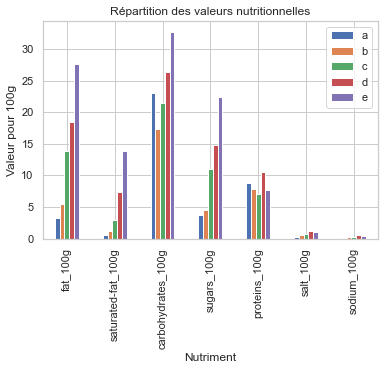

In [16]:
reparti = repartition_quantitative_values_rate(
    perfect_data,
    quantitative_exclude_energy,
    grouped_value="nutriscore_grade",
    normalize=False)
fig = reparti.plot.bar(stacked=False)
# figsize=(20, 15)
fig.set(title="Répartition des valeurs nutritionnelles")
fig.set(ylabel="Valeur pour 100g")
fig.set(xlabel="Nutriment")
plt.show()

In [17]:
@interact
def show_anova(colonnes=quantitative):
    print(f"Analyse de la variance pour la colonne {colonnes} :")
    anova_analysis(perfect_data,"nutriscore_grade",colonnes,display_na=False)
#     figsize=(15,10)

interactive(children=(Dropdown(description='colonnes', options=('energy-kcal_100g', 'energy_100g', 'fat_100g',…

In [18]:
list_group = list(perfect_data.groupby("nutriscore_grade").groups.keys())
macro = widgets.Checkbox(value=False,description='Afficher par macronutriment',disabled=False,indent=False)
@interact
def show_repartition_nutriscore(nutriscore_grade=list_group,macro_nutriment=macro):
    group = perfect_data.groupby("nutriscore_grade")
    value = group[quantitative_exclude_energy].describe().loc[:,(slice(None),['mean'])]
    value.columns = value.columns.droplevel(level=1)
    value = value.T
    if macro_nutriment:
        t=value.drop(value.index)
        t.loc["lipide (gras / gras saturé)",] = value.loc["fat_100g"] + value.loc["saturated-fat_100g"]
        t.loc["glucide (sucre lent/rapide)"] = value.loc["sugars_100g"] + value.loc["carbohydrates_100g"]
        t.loc["protéine"] = value.loc["proteins_100g"]
        t.loc["sel"] = value.loc["salt_100g"]
        value=t
    all_value = value[nutriscore_grade]
    repartition = (1 - (all_value.sum() - all_value)/all_value.sum()) * 100
    repartition=pd.DataFrame(repartition).rename(columns={nutriscore_grade:"values"})
    repartition["labels"]=repartition.index
    repartition.iplot(kind="pie",labels="labels",values="values",sort=False)

interactive(children=(Dropdown(description='nutriscore_grade', options=('a', 'b', 'c', 'd', 'e'), value='a'), …

# Recherche

In [19]:
def path_to_image_html(path):
    return '<img src="' + path + '" style=max-height:124px;"/>'


def display_all_data_with_image(image_data, data):
    df = pd.concat([data, image_data], axis=1, join="inner")
    return HTML(
        df.to_html(escape=False,
                   formatters=dict(image_url=path_to_image_html)))

## Contenu

In [20]:
tab_key =  list(data.groupby("nutriscore_grade").groups.keys())
tab_key.append("nan")

list_value_group = widgets.Dropdown(options=[v for v in tab_key],value=tab_key[0],description='group:',disabled=False)
all_col = get_all_numeric_col(data)
max_value_display = widgets.IntSlider(value=10, label='Nombre de lignes',max=250,min=5,step=1)
all_group = widgets.Checkbox(value=True,description='Afficher tous les groupes',disabled=False,indent=False)

product = widgets.Text(
    value='',
    placeholder='Nom du produit',
    description='Produit :',
    disabled=False
)

# change display option
pd.options.display.max_rows = 250
pd.options.display.max_columns = 25

@interact
def show_product_sorted(group=list_value_group,
                        col_focus=all_col,
                        nb_row=max_value_display,
                        all_group=all_group,
                        produit=product):
    if all_group:
        if len(produit) < 2:
            disp_data = data.sort_values(col_focus,ascending=False).head(nb_row)
            disp(display_all_data_with_image(image,disp_data))
        else:
            find = data[data.product_name.str.contains(produit)]
            if find.shape[0]!=0:
                disp_data = find.sort_values(col_focus,ascending=False).head(nb_row)
                disp(display_all_data_with_image(image,disp_data))
            else:
                print("Aucun produit ne contient :",produit)
    else:
        if group!="nan":
            if len(produit) < 2:
                g = data.groupby("nutriscore_grade")
                value = g.get_group(group)
                disp_data = value.sort_values(col_focus,ascending=False).head(nb_row)
                disp(display_all_data_with_image(image,disp_data))
            else:
                g = data.groupby("nutriscore_grade")
                value = g.get_group(group)
                find = value[value.product_name.str.contains(produit)]
                if find.shape[0]!=0:
                    disp_data = find.sort_values(col_focus,ascending=False).head(nb_row)
                    disp(display_all_data_with_image(image,disp_data))
                else:
                    print("Aucun produit ne contient :",produit)
        else:
            if len(produit) < 2:
                value = data[data["nutriscore_grade"].astype(str)=="nan"]
                disp_data = value.sort_values(col_focus,ascending=False).head(nb_row)
                disp(display_all_data_with_image(image,disp_data))
            else:
                value = data[data["nutriscore_grade"].astype(str)=="nan"]
                find = value[value.product_name.str.contains(produit)]
                if find.shape[0]!=0:
                    disp_data = find.sort_values(col_focus,ascending=False).head(nb_row)
                    disp(display_all_data_with_image(image,disp_data))
                else:
                    print("Aucun produit ne contient :",produit)

interactive(children=(Dropdown(description='group:', options=('a', 'b', 'c', 'd', 'e', 'nan'), value='a'), Dro…